
# First Analysis

In [2]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE

In [2]:
file_path = 'Borehole_Data.csv'
borehole_data = pd.read_csv(file_path)


In [3]:
# Load the initial data
file_path = 'Borehole_Data.csv'
borehole_data = pd.read_csv(file_path)

# Apply imputation to handle missing values
imputer = IterativeImputer(random_state=42)
imputed_data = imputer.fit_transform(borehole_data)
imputed_borehole_data = pd.DataFrame(imputed_data, columns=borehole_data.columns)

# Recreate the Ra and Ra_C columns
imputed_borehole_data['Ra'] = imputed_borehole_data['BS'] / imputed_borehole_data['CALI']
imputed_borehole_data['Ra_C'] = imputed_borehole_data['Ra'].apply(lambda x: 1 if 0.98 < x < 1.02 else 0)

# Split the data into train and test sets based on WELLNUM
train_data = imputed_borehole_data[imputed_borehole_data['WELLNUM'] != 5]
test_data = imputed_borehole_data[imputed_borehole_data['WELLNUM'] == 5]

# Extract the labels
train_labels = train_data['Ra_C']
test_labels = test_data['Ra_C']

# Drop the label columns from the train and test data
train_data = train_data.drop(columns=['Ra_C'])
test_data = test_data.drop(columns=['Ra_C'])

# Apply SMOTE to balance classes in the training data
smote = SMOTE(random_state=42)
train_data_balanced, train_labels_balanced = smote.fit_resample(train_data, train_labels)

# Check the frequency of Ra_C in the balanced training data
balanced_labels_frequency = train_labels_balanced.value_counts()
print(balanced_labels_frequency)


Ra_C
0    32311
1    32311
Name: count, dtype: int64


In [4]:
columns_to_drop = ['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra']
train_data_balanced = train_data_balanced.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

In [5]:
# Initialize the Random Forest Classifier with the specified parameters
clf = RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state=42)

# Train the model
clf.fit(train_data_balanced, train_labels_balanced)

# Predict the model on the test_data
test_predictions = clf.predict(test_data)



NameError: name 'RandomForestClassifier' is not defined

In [411]:
from sklearn.metrics import classification_report
# Display classification report
classification_rep = classification_report(test_labels, test_predictions)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       266
           1       0.91      0.90      0.90      1140

    accuracy                           0.84      1406
   macro avg       0.74      0.75      0.75      1406
weighted avg       0.84      0.84      0.84      1406



In [420]:
recall = recall_score(test_labels, test_predictions) 
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, test_predictions)  # For binary classification
print(f"Precision: {precision}")

f1 = f1_score(predictions,test_labels)
print(f"F1 Score: {f1}")
conf_matrix_df
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Create the confusion matrix as a DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=[0, 1], columns=[0, 1])
conf_matrix_df

Recall: 0.8982456140350877
Precision: 0.9061946902654867
F1 Score: 0.8730450781968722


,0,1
0,160,106
1,116,1024


# Beginning 

In [3]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, IsolationForest
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

In [8]:
da = pd.read_csv('Borehole_Data.csv')
#remove records with misising wellnum details
da2=da.loc[da['WELLNUM'] != 0]
imputer = IterativeImputer(max_iter = 15, random_state=0)
data = pd.DataFrame(imputer.fit_transform(da2), columns=da2.columns)
g=[]
for i in data['CALI'].values/data['BS'].values:
   
   if np.abs(i) > 1.02 or np.abs(i)<0.98:
       g.append(0)
   else:
       g.append(1)    
gg = np.array(g)
data['Ra'] = data['CALI']/data['BS']
data['Ra_C'] = gg
#test and train data
test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
#smote = SMOTE(random_state=42)
#train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)
# # Linear Regression
rf=RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state=42)
rf.fit(train,train_labels)
predictions= rf.predict(test)


conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])



recall = recall_score(test_labels, predictions) 
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions)  # For binary classification
print(f"Precision: {precision}")

f1 = f1_score(predictions,test_labels)
print(f"F1 Score: {f1}")
conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_456\1091882817.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_456\1091882817.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)


Recall: 0.9373522458628841
Precision: 0.7669245647969052
F1 Score: 0.8436170212765958


,Predicted Negative,Predicted Positive
Actual Negative,319,241
Actual Positive,53,793


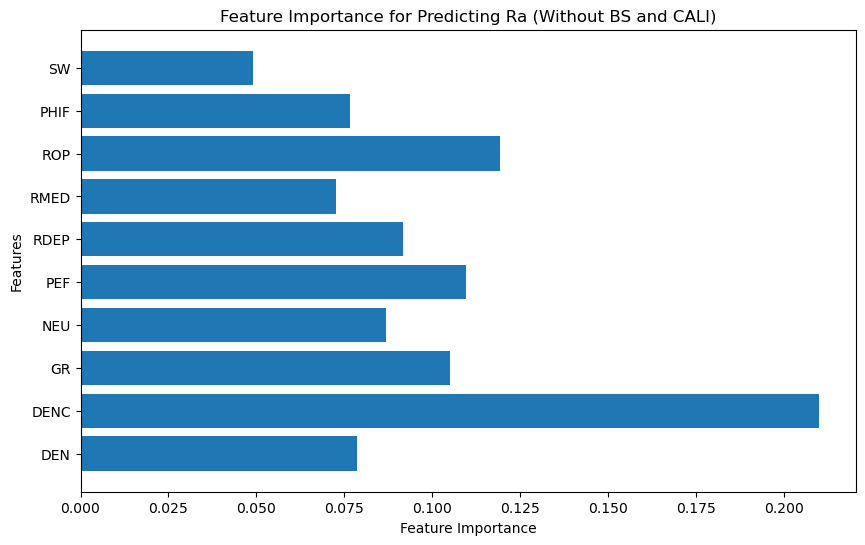

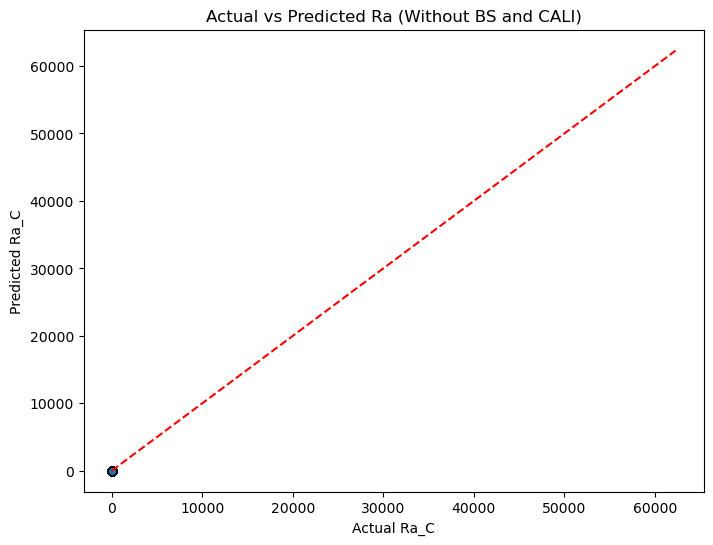

In [390]:
feature_importances = rf.feature_importances_
features = train.columns

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Predicting Ra (Without BS and CALI)')
plt.show()

# Plot Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(test_labels, predictions, edgecolor='k', alpha=0.7)
plt.plot([test.min(), test.max()], [test.min(), test.max()], 'r--')
plt.xlabel('Actual Ra_C')
plt.ylabel('Predicted Ra_C')
plt.title('Actual vs Predicted Ra (Without BS and CALI)')
plt.show()

# Isolation  Forest applied before BS/CALI filter

In [374]:
# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=15, random_state=0)
data = pd.DataFrame(imputer.fit_transform(da2), columns=da2.columns)

# Loop over different contamination values
contamination_values = [0.025, 0.05, 0.1, 0.15, 0.2] 
results = []

for contamination in contamination_values:
    isolation_forest = IsolationForest(contamination=contamination, random_state=0)
    
    # Fit the model and predict outliers
    outliers = isolation_forest.fit_predict(data)
    
    # Filter out the outliers
    filtered_data = data[outliers != -1]
    g = []
    for i in filtered_data['CALI'].values / filtered_data['BS'].values:
        if np.abs(i) > 1.02 or np.abs(i) < 0.98:
            g.append(0)
        else:
            g.append(1)
    
    gg = np.array(g)
    filtered_data['Ra'] = filtered_data['CALI'] / data['BS']
    filtered_data['Ra_C'] = gg
    
    # Test and train data
    test = filtered_data.loc[filtered_data['WELLNUM'] == 5]
    test_labels = test['Ra_C']
    train = filtered_data.loc[filtered_data['WELLNUM'] != 5]
    train_labels = train['Ra_C']
    
    # Drop irrelevant columns
    train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
    test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
    
    # Train the RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state = 0)
    rf.fit(train, train_labels)
    predictions = rf.predict(test)
    conf_matrix = confusion_matrix(test_labels, predictions)
    
   
    f1 = f1_score(test_labels, predictions)
    
   
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  index=['Actual Negative', 'Actual Positive'], 
                                  columns=['Predicted Negative', 'Predicted Positive'])
    
  
    results.append({
        'contamination': contamination,
        'conf_matrix': conf_matrix_df,
        'f1_score': f1
    })

# Display the results
for result in results:
    print(f"Contamination: {result['contamination']}")
    print(result['conf_matrix'])
    print(f"F1 Score: {result['f1_score']}")
    print("\n")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\desti\AppData\Local\Temp\ipykernel_16684\894403429.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra'] = filtered_data['CALI'] / data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_16684\894403429.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra_C'] = gg
C:\Users\desti\AppDat

Contamination: 0.025
                 Predicted Negative  Predicted Positive
Actual Negative                 309                 244
Actual Positive                  52                 788
F1 Score: 0.8418803418803419


Contamination: 0.05
                 Predicted Negative  Predicted Positive
Actual Negative                 310                 243
Actual Positive                  49                 791
F1 Score: 0.8441835645677694


Contamination: 0.1
                 Predicted Negative  Predicted Positive
Actual Negative                 304                 242
Actual Positive                  62                 777
F1 Score: 0.8363832077502691


Contamination: 0.15
                 Predicted Negative  Predicted Positive
Actual Negative                 281                 233
Actual Positive                  57                 766
F1 Score: 0.8408342480790341


Contamination: 0.2
                 Predicted Negative  Predicted Positive
Actual Negative                 273              

# Isolation Forest after BS/CALI filter

In [386]:
imputer = IterativeImputer(max_iter = 15, random_state=42)
data = pd.DataFrame(imputer.fit_transform(da2), columns=da2.columns)
g=[]
for i in data['CALI'].values/data['BS'].values:
   
   if np.abs(i) > 1.02 or np.abs(i)<0.98:
       g.append(0)
   else:
       g.append(1)    
gg = np.array(g)
data['Ra'] = data['CALI']/data['BS']
data['Ra_C'] = gg
#test and train data
test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
iforest = IsolationForest(n_estimators = 100, contamination = 0.05, random_state = 42)
pre = iforest.fit_predict(train)
train = train[pre != -1] #Here I am trying to remove the outliers on the train data alone and leave the test data as is.
train_labels = train['Ra_C']
#drop irrelevant columns
train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)
rf=RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state = 42)
rf.fit(train,train_labels)
predictions= rf.predict(test)
conf_matrix = confusion_matrix(test_labels, predictions)

# Create a DataFrame from the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])


f1 = f1_score(predictions,test_labels)
print(f"F1 Score: {f1}")
conf_matrix_df

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\desti\AppData\Local\Temp\ipykernel_16684\3377301340.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)


F1 Score: 0.8399787347155767


,Predicted Negative,Predicted Positive
Actual Negative,315,245
Actual Positive,56,790


# Analysis with other selected features

In [376]:
da = pd.read_csv('Borehole_Data.csv')
da2=da.loc[da['WELLNUM'] != 0]
imputer = IterativeImputer(max_iter = 15, random_state=0)
data = pd.DataFrame(imputer.fit_transform(da2), columns=da2.columns)
g=[]
for i in data['CALI'].values/data['BS'].values:
   
   if np.abs(i) > 1.02 or np.abs(i)<0.98:
       g.append(0)
   else:
       g.append(1)    

gg = np.array(g)

data['Ra'] = data['CALI']/data['BS']
data['Ra_C'] = gg

In [377]:
data.columns

Index(['WELLNUM', 'DEPTH', 'DTC', 'DTS', 'BS', 'CALI', 'DEN', 'DENC', 'GR',
       'NEU', 'PEF', 'RDEP', 'RMED', 'ROP', 'PHIF', 'SW', 'VSH', 'Ra', 'Ra_C'],
      dtype='object')

In [378]:
#test and train data
test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']


#drop irrelevant columns
train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C','SW', 'RDEP','DENC'], axis=1, inplace=True)
test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C','SW', 'RDEP','DENC'], axis=1, inplace=True)

rf=RandomForestClassifier(n_estimators=150, max_depth=40, min_samples_leaf=6, max_features = 0.5, random_state = 42)
rf.fit(train,train_labels)
predictions= rf.predict(test)

recall = recall_score(test_labels, predictions) 


f1 = f1_score(predictions,test_labels)
precision = precision_score(test_labels, predictions)  
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_16684\1337690937.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C','SW', 'RDEP','DENC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_16684\1337690937.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C','SW', 'RDEP','DENC'], axis=1, inplace=True)


Recall: 0.9633569739952719
Precision: 0.7388939256572983
F1 Score: 0.8363263211903541


,Predicted Negative,Predicted Positive
Actual Negative,272,288
Actual Positive,31,815


ROC-AUC Score: 0.83


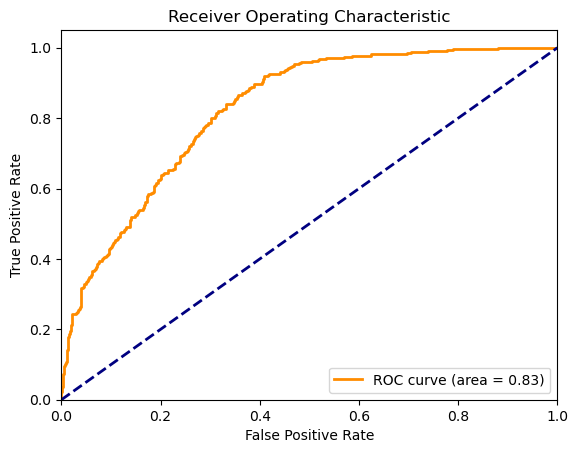

In [379]:
from sklearn.metrics import roc_auc_score, roc_curve
y_probs = rf.predict_proba(test)[:, 1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(test_labels, y_probs)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Same features as above with Isolation Forest Implemented

In [380]:
# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=15, random_state=0)
data = pd.DataFrame(imputer.fit_transform(da2), columns=da2.columns)

# Loop over different contamination values
contamination_values = [0.025, 0.05, 0.1, 0.15, 0.2] 
results = []

for contamination in contamination_values:
    isolation_forest = IsolationForest(contamination=contamination, random_state=0)
    
    # Fit the model and predict outliers
    outliers = isolation_forest.fit_predict(data)
    
    # Filter out the outliers
    filtered_data = data[outliers != -1]
    g = []
    for i in filtered_data['CALI'].values / filtered_data['BS'].values:
        if np.abs(i) > 1.02 or np.abs(i) < 0.98:
            g.append(0)
        else:
            g.append(1)
    
    gg = np.array(g)
    filtered_data['Ra'] = filtered_data['CALI'] / data['BS']
    filtered_data['Ra_C'] = gg
    
    # Test and train data
    test = filtered_data.loc[filtered_data['WELLNUM'] == 5]
    test_labels = test['Ra_C']
    train = filtered_data.loc[filtered_data['WELLNUM'] != 5]
    train_labels = train['Ra_C']
    
    # Drop irrelevant columns
    train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C','SW', 'RDEP','DENC'], axis=1, inplace=True)
    test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C','SW', 'RDEP','DENC'], axis=1, inplace=True)


    
    # Train the RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state = 0)
    rf.fit(train, train_labels)
    predictions = rf.predict(test)
    conf_matrix = confusion_matrix(test_labels, predictions)
    
    # Calculate F1 score
    f1 = f1_score(test_labels, predictions)
    
    # Create a DataFrame from the confusion matrix
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  index=['Actual Negative', 'Actual Positive'], 
                                  columns=['Predicted Negative', 'Predicted Positive'])
    
  
    results.append({
        'contamination': contamination,
        'conf_matrix': conf_matrix_df,
        'f1_score': f1
    })

# Display the results
for result in results:
    print(f"Contamination: {result['contamination']}")
    print(result['conf_matrix'])
    print(f"F1 Score: {result['f1_score']}")
    print("\n")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\desti\AppData\Local\Temp\ipykernel_16684\979642041.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra'] = filtered_data['CALI'] / data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_16684\979642041.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra_C'] = gg
C:\Users\desti\AppDat

Contamination: 0.025
                 Predicted Negative  Predicted Positive
Actual Negative                 257                 296
Actual Positive                  23                 817
F1 Score: 0.8366615463389657


Contamination: 0.05
                 Predicted Negative  Predicted Positive
Actual Negative                 261                 292
Actual Positive                  20                 820
F1 Score: 0.8401639344262294


Contamination: 0.1
                 Predicted Negative  Predicted Positive
Actual Negative                 268                 278
Actual Positive                  28                 811
F1 Score: 0.8412863070539419


Contamination: 0.15
                 Predicted Negative  Predicted Positive
Actual Negative                 243                 271
Actual Positive                  26                 797
F1 Score: 0.8429402432575357


Contamination: 0.2
                 Predicted Negative  Predicted Positive
Actual Negative                 231              

# Another feature analysis

In [381]:
# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=15, random_state=0)
data = pd.DataFrame(imputer.fit_transform(da2), columns=da2.columns)

# Loop over different contamination values
contamination_values = [0.025, 0.05, 0.1, 0.15, 0.2] 
results = []

for contamination in contamination_values:
    isolation_forest = IsolationForest(contamination=contamination, random_state=0)
    
    # Fit the model and predict outliers
    outliers = isolation_forest.fit_predict(data)
    
    # Filter out the outliers
    filtered_data = data[outliers != -1]
    g = []
    for i in filtered_data['CALI'].values / filtered_data['BS'].values:
        if np.abs(i) > 1.02 or np.abs(i) < 0.98:
            g.append(0)
        else:
            g.append(1)
    
    gg = np.array(g)
    filtered_data['Ra'] = filtered_data['CALI'] / data['BS']
    filtered_data['Ra_C'] = gg
    
    # Test and train data
    test = filtered_data.loc[filtered_data['WELLNUM'] == 5]
    test_labels = test['Ra_C']
    train = filtered_data.loc[filtered_data['WELLNUM'] != 5]
    train_labels = train['Ra_C']
    
    # Drop irrelevant columns
    train.drop(['DTS', 'WELLNUM', 'DEPTH', 'BS', 'CALI', 'Ra', 'Ra_C','ROP'], axis=1, inplace=True)
    test.drop(['DTS', 'WELLNUM', 'DEPTH', 'BS', 'CALI','Ra', 'Ra_C','ROP'], axis=1, inplace=True)

    
    # Train the RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state = 0)
    rf.fit(train, train_labels)
    predictions = rf.predict(test)
    conf_matrix = confusion_matrix(test_labels, predictions)
    
    # Calculate F1 score
    f1 = f1_score(test_labels, predictions)
    
    # Create a DataFrame from the confusion matrix
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  index=['Actual Negative', 'Actual Positive'], 
                                  columns=['Predicted Negative', 'Predicted Positive'])
    
  
    results.append({
        'contamination': contamination,
        'conf_matrix': conf_matrix_df,
        'f1_score': f1
    })

# Display the results
for result in results:
    print(f"Contamination: {result['contamination']}")
    print(result['conf_matrix'])
    print(f"F1 Score: {result['f1_score']}")
    print("\n")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\desti\AppData\Local\Temp\ipykernel_16684\4187064604.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra'] = filtered_data['CALI'] / data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_16684\4187064604.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra_C'] = gg
C:\Users\desti\AppD

Contamination: 0.025
                 Predicted Negative  Predicted Positive
Actual Negative                 320                 233
Actual Positive                  48                 792
F1 Score: 0.8493297587131368


Contamination: 0.05
                 Predicted Negative  Predicted Positive
Actual Negative                 306                 247
Actual Positive                  43                 797
F1 Score: 0.846072186836518


Contamination: 0.1
                 Predicted Negative  Predicted Positive
Actual Negative                 313                 233
Actual Positive                  41                 798
F1 Score: 0.8534759358288769


Contamination: 0.15
                 Predicted Negative  Predicted Positive
Actual Negative                 272                 242
Actual Positive                  35                 788
F1 Score: 0.8505126821370751


Contamination: 0.2
                 Predicted Negative  Predicted Positive
Actual Negative                 233               

# Feature Engineering


In [382]:
file_path = 'Borehole_Data.csv'
borehole_data = pd.read_csv(file_path)

# Remove rows where WELLNUM is 0
filtered_data = borehole_data[borehole_data['WELLNUM'] != 0]

# Remove the ROP, DTS, and DEPTH columns
filtered_data = filtered_data.drop(columns=['ROP', 'DTS', 'DEPTH'])

# Initialize the Iterative Imputer
imputer =  IterativeImputer(max_iter = 15, random_state=0)

# Apply the Iterative Imputer to the dataset
imputed_data = imputer.fit_transform(filtered_data)

# Convert the imputed data back into a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=filtered_data.columns)
g=[]
for i in imputed_df['CALI'].values/imputed_df['BS'].values:
   
   if np.abs(i) > 1.02 or np.abs(i)<0.98:
       g.append(0)
   else:
       g.append(1)    

gg = np.array(g)

imputed_df['Ra'] = imputed_df['CALI']/imputed_df['BS']
imputed_df['Ra_C'] = gg
imputed_df.head()
# Calculate the minimum and maximum GR values
GR_min = imputed_df['GR'].min()
GR_max = imputed_df['GR'].max()

# Calculate the gamma ray index (Igr)
imputed_df['Igr'] = (imputed_df['GR'] - GR_min) / (GR_max - GR_min)


In [383]:
#test and train data
test=imputed_df.loc[imputed_df['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=imputed_df.loc[imputed_df['WELLNUM'] != 5]
train_labels = train['Ra_C']


#drop irrelevant columns
train.drop(['WELLNUM', 'BS', 'CALI', 'Ra', 'Ra_C','GR'], axis=1, inplace=True)
test.drop([ 'WELLNUM', 'BS', 'CALI','Ra', 'Ra_C','GR'], axis=1, inplace=True)

#iforest = IsolationForest(n_estimators = 100, contamination = 0.1)
# = iforest.fit_predict(train)


#print(pre)
rf=RandomForestClassifier(n_estimators=150, max_depth=40, min_samples_leaf=6, max_features = 0.5, random_state = 40)

rf.fit(train,train_labels)
predictions= rf.predict(test)

recall = recall_score(test_labels, predictions)
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions) 
print(f"Precision: {precision}")
f1 = f1_score(predictions,test_labels)
print(f"F1 Score: {f1}")
conf_matrix = confusion_matrix(test_labels, predictions)

conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])

conf_matrix_df


C:\Users\desti\AppData\Local\Temp\ipykernel_16684\2587126738.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['WELLNUM', 'BS', 'CALI', 'Ra', 'Ra_C','GR'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_16684\2587126738.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop([ 'WELLNUM', 'BS', 'CALI','Ra', 'Ra_C','GR'], axis=1, inplace=True)


Recall: 0.9373522458628841
Precision: 0.7610364683301344
F1 Score: 0.840042372881356


,Predicted Negative,Predicted Positive
Actual Negative,311,249
Actual Positive,53,793


# XGBoost with Isolation Forest, try without imputation

In [384]:
# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=15, random_state=0)
data = pd.DataFrame(imputer.fit_transform(da2), columns=da2.columns)

# Loop over different contamination values
contamination_values = [0.025, 0.05, 0.1, 0.15, 0.2] 
results = []

for contamination in contamination_values:
    isolation_forest = IsolationForest(contamination=contamination, random_state=0)
    
    # Fit the model and predict outliers
    outliers = isolation_forest.fit_predict(data)
    
    # Filter out the outliers
    filtered_data = data[outliers != -1]
    g = []
    for i in filtered_data['CALI'].values / filtered_data['BS'].values:
        if np.abs(i) > 1.02 or np.abs(i) < 0.98:
            g.append(0)
        else:
            g.append(1)
    
    gg = np.array(g)
    filtered_data['Ra'] = filtered_data['CALI'] / data['BS']
    filtered_data['Ra_C'] = gg
    
    # Test and train data
    test = filtered_data.loc[filtered_data['WELLNUM'] == 5]
    test_labels = test['Ra_C']
    train = filtered_data.loc[filtered_data['WELLNUM'] != 5]
    train_labels = train['Ra_C']
    
    # Drop irrelevant columns
    train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
    test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
    
    # Train the XGBoost Classifier
    xgb = XGBClassifier(n_estimators=150, max_depth=30, min_child_weight=3, random_state=0)
    xgb.fit(train, train_labels)
    predictions = xgb.predict(test)
    conf_matrix = confusion_matrix(test_labels, predictions)
    
    # Calculate F1 score
    f1 = f1_score(test_labels, predictions)
    
    # Create a DataFrame from the confusion matrix
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  index=['Actual Negative', 'Actual Positive'], 
                                  columns=['Predicted Negative', 'Predicted Positive'])
    
    # Store the results
    results.append({
        'contamination': contamination,
        'conf_matrix': conf_matrix_df,
        'f1_score': f1
    })

# Display the results
for result in results:
    print(f"Contamination: {result['contamination']}")
    print(result['conf_matrix'])
    print(f"F1 Score: {result['f1_score']}")
    print("\n")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\desti\AppData\Local\Temp\ipykernel_16684\2372552720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra'] = filtered_data['CALI'] / data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_16684\2372552720.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra_C'] = gg
C:\Users\desti\AppD

Contamination: 0.025
                 Predicted Negative  Predicted Positive
Actual Negative                 300                 253
Actual Positive                  70                 770
F1 Score: 0.8266237251744498


Contamination: 0.05
                 Predicted Negative  Predicted Positive
Actual Negative                 306                 247
Actual Positive                  77                 763
F1 Score: 0.8248648648648649


Contamination: 0.1
                 Predicted Negative  Predicted Positive
Actual Negative                 296                 250
Actual Positive                  78                 761
F1 Score: 0.8227027027027026


Contamination: 0.15
                 Predicted Negative  Predicted Positive
Actual Negative                 287                 227
Actual Positive                  80                 743
F1 Score: 0.8287785833798105


Contamination: 0.2
                 Predicted Negative  Predicted Positive
Actual Negative                 291              

# XGBoost without Isolation Forest

In [385]:
# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=15, random_state=0)
data = pd.DataFrame(imputer.fit_transform(da2), columns=da2.columns)

def process_data_and_train(data):
    # Filter data based on custom logic
    g = []
    for i in data['CALI'].values / data['BS'].values:
        if np.abs(i) > 1.02 or np.abs(i) < 0.98:
            g.append(0)
        else:
            g.append(1)
    
    gg = np.array(g)
    data['Ra'] = data['CALI'] / data['BS']
    data['Ra_C'] = gg
    
    # Test and train data
    test = data.loc[data['WELLNUM'] == 5]
    test_labels = test['Ra_C']
    train = data.loc[data['WELLNUM'] != 5]
    train_labels = train['Ra_C']
    
    # Drop irrelevant columns
    train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
    test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
    

    
    # Train the XGBoost Classifier
    xgb = XGBClassifier(n_estimators=150, max_depth=30, min_child_weight=3, random_state=0)
    xgb.fit(train, train_labels)
    predictions = xgb.predict(test)
    conf_matrix = confusion_matrix(test_labels, predictions)
    
    # Calculate F1 score
    f1 = f1_score(test_labels, predictions)
    
    # Create a DataFrame from the confusion matrix
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  index=['Actual Negative', 'Actual Positive'], 
                                  columns=['Predicted Negative', 'Predicted Positive'])
    
    return conf_matrix_df, f1


conf_matrix_df, f1 = process_data_and_train(data)

print("Confusion Matrix:")
print(conf_matrix_df)
print(f"F1 Score: {f1}")


C:\Users\desti\AppData\Local\Temp\ipykernel_16684\3567261207.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_16684\3567261207.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 308                 252
Actual Positive                  74                 772
F1 Score: 0.8256684491978609


# Random Forest with Lagged Differencing

In [437]:
da = pd.read_csv('Borehole_Data.csv')
#remove records with misising wellnum details
da2=da.loc[da['WELLNUM'] != 0]
imputer = IterativeImputer(max_iter = 15, random_state=0)
data = pd.DataFrame(imputer.fit_transform(da2), columns=da2.columns)
g=[]
for i in data['CALI'].values/data['BS'].values:
   
   if np.abs(i) > 1.02 or np.abs(i)<0.98:
       g.append(0)
   else:
       g.append(1)    
gg = np.array(g)
data['Ra'] = data['CALI']/data['BS']
data['Ra_C'] = gg
# Create the GR_ column where each value is the difference between the next and current value of GR
data['GR_'] = data['GR'].diff().fillna(0)
# Create the NEU_ column where each value is the difference between the next and current value of NEU
data['NEU_'] = data['NEU'].diff().fillna(0)
data['ROP_'] = data['ROP'].diff().fillna(0)
data['DENC_'] = data['DENC'].diff().fillna(0)
data['PEF_'] = data['PEF'].diff().fillna(0)
#test and train data
test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
#smote = SMOTE(random_state=42)
#train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)
# # Linear Regression
rf=RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state=42)
rf.fit(train,train_labels)
predictions= rf.predict(test)


conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])



recall = recall_score(test_labels, predictions) 
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions)  # For binary classification
print(f"Precision: {precision}")

f1 = f1_score(predictions,test_labels)
print(f"F1 Score: {f1}")
conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_16684\1690319364.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_16684\1690319364.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)


Recall: 0.9385342789598109
Precision: 0.7686350435624395
F1 Score: 0.8451303885045237


,Predicted Negative,Predicted Positive
Actual Negative,321,239
Actual Positive,52,794


In [102]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

# Load the initial data
da = pd.read_csv('Borehole_Data.csv')

# Remove records with missing wellnum details
da2 = da.loc[da['WELLNUM'] != 0]
da2['Ra'] = da2['CALI']/da2['BS']
g = []
for i in da2['Ra']:
    if np.abs(i) > 1.02 or np.abs(i) < 0.98:
        g.append(0)
    else:
        g.append(1)
gg = np.array(g)

da2['Ra_C'] = gg


C:\Users\desti\AppData\Local\Temp\ipykernel_9816\1651278809.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da2['Ra'] = da2['CALI']/da2['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_9816\1651278809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da2['Ra_C'] = gg


In [101]:
da2[da2['WELLNUM']== 5]['Ra_C'].value_counts()

Ra_C
0    846
1    560
Name: count, dtype: int64

# XGBoost with Lagged Differencing

In [11]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

# Load the initial data
da = pd.read_csv('Borehole_Data.csv')

# Remove records with missing wellnum details
da2 = da.loc[da['WELLNUM'] != 0]

# Apply imputation to handle missing values
imputer = IterativeImputer(max_iter=15, random_state=0)
data = pd.DataFrame(imputer.fit_transform(da2), columns=da2.columns)

# Create the Ra_C column based on the condition
g = []
for i in data['CALI'].values / data['BS'].values:
    if np.abs(i) > 1.02 or np.abs(i) < 0.98:
        g.append(0)
    else:
        g.append(1)
gg = np.array(g)
data['Ra'] = data['CALI'] / data['BS']
data['Ra_C'] = gg

# Create the GR_ column where each value is the difference between the next and current value of GR
data['GR_'] = data['GR'].diff().fillna(0)
# Create the NEU_ column where each value is the difference between the next and current value of NEU
data['NEU_'] = data['NEU'].diff().fillna(0)
data['ROP_'] = data['ROP'].diff().fillna(0)
data['DENC_'] = data['DENC'].diff().fillna(0)
data['PEF_'] = data['PEF'].diff().fillna(0)

# Split the data into test and train sets
test = data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train = data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']

# Drop irrelevant columns
train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)

# Train an XGBoost model
xgb_model = XGBClassifier(n_estimators=150, max_depth=30, min_child_weight=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(train, train_labels)

# Predict the model on the test data
predictions = xgb_model.predict(test)

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])

# Calculate recall
recall = recall_score(test_labels, predictions) 
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions)  # For binary classification
print(f"Precision: {precision}")

# Calculate F1 score
f1 = f1_score(test_labels, predictions)
print(f"F1 Score: {f1}")

# Display confusion matrix
conf_matrix_df


C:\Users\desti\AppData\Local\Temp\ipykernel_456\4287755950.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_456\4287755950.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['DTC', 'DTS', 'WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)


Recall: 0.9290780141843972
Precision: 0.7766798418972332
F1 Score: 0.8460710441334769


,Predicted Negative,Predicted Positive
Actual Negative,334,226
Actual Positive,60,786


In [88]:
test_labels.value_counts()

Ra_C
1    846
0    560
Name: count, dtype: int64

# Support Vector 

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(train, train_labels)
predictions = svm_model.predict(test)

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])

# Calculate recall
recall = recall_score(test_labels, predictions)
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions)
print(f"Precision: {precision}")

# Calculate F1 score
f1 = f1_score(test_labels, predictions)
print(f"F1 Score: {f1}")

# Display confusion matrix
conf_matrix_df


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train, train_labels)
predictions = knn_model.predict(test)

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])

# Calculate recall
recall = recall_score(test_labels, predictions)
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions)
print(f"Precision: {precision}")

# Calculate F1 score
f1 = f1_score(test_labels, predictions)
print(f"F1 Score: {f1}")

# Display confusion matrix
conf_matrix_df


In [12]:
import pandas as pd
import numpy as np
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from imblearn.over_sampling import SMOTE
import numpy as np
# Load the CSV file
file_path = 'Borehole_Data.csv'
data = pd.read_csv(file_path)
# Filter out all the records where WELLNUM is 0
filtered_data = data[data['WELLNUM'] != 0]
filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']

g=[]
for i in filtered_data['Ra'].values:
   
   if np.abs(i) > 1.02 or np.abs(i)<0.98:
       g.append(0)
   else:
       g.append(1)    
gg = np.array(g)
filtered_data['Ra_C'] = gg


imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10), random_state=0, max_iter=20)
data = imputer.fit_transform(filtered_data)

# Convert X_imputed back to a DataFrame (if needed)
data = pd.DataFrame(data, columns=filtered_data.columns)

test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
#smote = SMOTE(random_state=42)
#train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)
# # Linear Regression
rf=RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state=42)
rf.fit(train,train_labels)
predictions= rf.predict(test)


conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])



recall = recall_score(test_labels, predictions) 
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions)  # For binary classification
print(f"Precision: {precision}")

f1 = f1_score(predictions,test_labels)
print(f"F1 Score: {f1}")
conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_456\2208016510.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_456\2208016510.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_456\2208016510.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Recall: 0.9385342789598109
Precision: 0.7590822179732314
F1 Score: 0.839323467230444


,Predicted Negative,Predicted Positive
Actual Negative,308,252
Actual Positive,52,794


# Random Forest with Lagged Differencing and SMOTE

In [14]:
import pandas as pd
import numpy as np
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from imblearn.over_sampling import SMOTE
import numpy as np
# Load the CSV file
file_path = 'Borehole_Data.csv'
data = pd.read_csv(file_path)
# Filter out all the records where WELLNUM is 0
filtered_data = data[data['WELLNUM'] != 0]
filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']

g=[]
for i in filtered_data['Ra'].values:
   
   if np.abs(i) > 1.02 or np.abs(i)<0.98:
       g.append(0)
   else:
       g.append(1)    
gg = np.array(g)
filtered_data['Ra_C'] = gg
data['GR_'] = data['GR'].diff().fillna(0)
data['NEU_'] = data['NEU'].diff().fillna(0)
data['ROP_'] = data['ROP'].diff().fillna(0)
data['DENC_'] = data['DENC'].diff().fillna(0)
data['PEF_'] = data['PEF'].diff().fillna(0)


imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10), random_state=0, max_iter=20)
data = imputer.fit_transform(filtered_data)

# Convert X_imputed back to a DataFrame (if needed)
data = pd.DataFrame(data, columns=filtered_data.columns)

test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
smote = SMOTE(random_state=42)
train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)
# # Linear Regression
rf=RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state=42)
rf.fit(train,train_labels)
predictions= rf.predict(test)


conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])



recall = recall_score(test_labels, predictions) 
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions)  # For binary classification
print(f"Precision: {precision}")

f1 = f1_score(predictions,test_labels)
print(f"F1 Score: {f1}")
conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_456\4278451571.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_456\4278451571.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_456\4278451571.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Recall: 0.9030732860520094
Precision: 0.7717171717171717
F1 Score: 0.8322440087145969


,Predicted Negative,Predicted Positive
Actual Negative,334,226
Actual Positive,82,764


# KNN with Lagged Differencing and SMOTE

In [15]:
import pandas as pd
import numpy as np
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from imblearn.over_sampling import SMOTE

# Load the CSV file
file_path = 'Borehole_Data.csv'
data = pd.read_csv(file_path)

# Filter out all the records where WELLNUM is 0
filtered_data = data[data['WELLNUM'] != 0]
filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
filtered_data['Ra'] = filtered_data['CALI'] / filtered_data['BS']

g = []
for i in filtered_data['Ra'].values:
    if np.abs(i) > 1.02 or np.abs(i) < 0.98:
        g.append(0)
    else:
        g.append(1)
gg = np.array(g)
filtered_data['Ra_C'] = gg

imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), random_state=0, max_iter=20)
data = imputer.fit_transform(filtered_data)

# Convert X_imputed back to a DataFrame (if needed)
data = pd.DataFrame(data, columns=filtered_data.columns)


test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
smote = SMOTE(random_state=42)
train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)

# LSTM expects input in the form of [samples, time steps, features]
train = np.array(train).reshape((train.shape[0], 1, train.shape[1]))
test = np.array(test).reshape((test.shape[0], 1, test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(train.shape[1], train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(train, train_labels, epochs=10, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

# Evaluate model performance
predictions = predictions.flatten()
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])

recall = recall_score(test_labels, predictions)
print(f"Recall: {recall}")

precision = precision_score(test_labels, predictions)
print(f"Precision: {precision}")

f1 = f1_score(test_labels, predictions)
print(f"F1 Score: {f1}")

conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_456\1992920373.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_456\1992920373.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra'] = filtered_data['CALI'] / filtered_data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_456\1992920373.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Epoch 1/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6704 - loss: 0.5997
Epoch 2/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7558 - loss: 0.5043
Epoch 3/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7714 - loss: 0.4764
Epoch 4/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7733 - loss: 0.4669
Epoch 5/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7815 - loss: 0.4545
Epoch 6/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7839 - loss: 0.4457
Epoch 7/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7884 - loss: 0.4413
Epoch 8/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7948 - loss: 0.4318
Epoch 9/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7995 - loss: 0.4260
Epoch 10/10
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7974 - loss: 0.4256
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Recall: 0.6442080378250591
Precision: 0.7841726618705036
F1 Score: 0.

,Predicted Negative,Predicted Positive
Actual Negative,410,150
Actual Positive,301,545


# AdaBoost with SMOTE applied 

In [107]:
import pandas as pd
import numpy as np
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE

# Load the CSV file
file_path = 'Borehole_Data.csv'
data = pd.read_csv(file_path)

# Filter out all the records where WELLNUM is 0
filtered_data = data[data['WELLNUM'] != 0]
filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
filtered_data['Ra'] = filtered_data['CALI'] / filtered_data['BS']

g = []
for i in filtered_data['Ra'].values:
    if np.abs(i) > 1.02 or np.abs(i) < 0.98:
        g.append(0)
    else:
        g.append(1)
gg = np.array(g)
filtered_data['Ra_C'] = gg


imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10), random_state=0, max_iter=20)
data = imputer.fit_transform(filtered_data)

# Convert X_imputed back to a DataFrame (if needed)
data = pd.DataFrame(data, columns=filtered_data.columns)

test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
smote = SMOTE(random_state=42)
train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)

# Initialize AdaBoost classifier with DecisionTree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the model
ada_boost.fit(train, train_labels)

# Make predictions
predictions = ada_boost.predict(test)

# Evaluate model performance
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])

recall = recall_score(test_labels, predictions)
print(f"Recall: {recall}")

precision = precision_score(test_labels, predictions)
print(f"Precision: {precision}")

f1 = f1_score(test_labels, predictions)
print(f"F1 Score: {f1}")

conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_9816\215103968.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_9816\215103968.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra'] = filtered_data['CALI'] / filtered_data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_9816\215103968.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Recall: 0.7576832151300237
Precision: 0.776969696969697
F1 Score: 0.7672052663076003


,Predicted Negative,Predicted Positive
Actual Negative,376,184
Actual Positive,205,641


# AdaBoost with Lagged Differencing and SMOTE applied

In [16]:
import pandas as pd
import numpy as np
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE

# Load the CSV file
file_path = 'Borehole_Data.csv'
data = pd.read_csv(file_path)

# Filter out all the records where WELLNUM is 0
filtered_data = data[data['WELLNUM'] != 0]
filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
filtered_data['Ra'] = filtered_data['CALI'] / filtered_data['BS']

g = []
for i in filtered_data['Ra'].values:
    if np.abs(i) > 1.02 or np.abs(i) < 0.98:
        g.append(0)
    else:
        g.append(1)
gg = np.array(g)
filtered_data['Ra_C'] = gg

# Lagged Differencing
data['GR_'] = data['GR'].diff().fillna(0)
data['NEU_'] = data['NEU'].diff().fillna(0)
data['ROP_'] = data['ROP'].diff().fillna(0)
data['DENC_'] = data['DENC'].diff().fillna(0)
data['PEF_'] = data['PEF'].diff().fillna(0)

imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10), random_state=0, max_iter=10)
data = imputer.fit_transform(filtered_data)

# Convert X_imputed back to a DataFrame (if needed)
data = pd.DataFrame(data, columns=filtered_data.columns)

test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
smote = SMOTE(random_state=42)
train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)

# Initialize AdaBoost classifier with DecisionTree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the model
ada_boost.fit(train, train_labels)

# Make predictions
predictions = ada_boost.predict(test)

# Evaluate model performance
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])

recall = recall_score(test_labels, predictions)
print(f"Recall: {recall}")

precision = precision_score(test_labels, predictions)
print(f"Precision: {precision}")

f1 = f1_score(test_labels, predictions)
print(f"F1 Score: {f1}")

conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_456\679566972.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_456\679566972.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra'] = filtered_data['CALI'] / filtered_data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_456\679566972.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Recall: 0.7576832151300237
Precision: 0.776969696969697
F1 Score: 0.7672052663076003


,Predicted Negative,Predicted Positive
Actual Negative,376,184
Actual Positive,205,641


# BoxCox

In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE

# Load the CSV file
file_path = 'Borehole_Data.csv'
data = pd.read_csv(file_path)

# Filter out all the records where WELLNUM is 0
filtered_data = data[data['WELLNUM'] != 0]
filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
filtered_data[['DENC','NEU','PEF']] = filtered_data[['DENC','NEU','PEF']] + 1
filtered_data['Ra'] = filtered_data['BS'] / filtered_data['CALI']

g = []
for i in filtered_data['Ra'].values:
    if np.abs(i) > 1.02 or np.abs(i) < 0.98:
        g.append(0)
    else:
        g.append(1)
gg = np.array(g)
filtered_data['Ra_C'] = gg



imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10), random_state=0, max_iter=10)
data = imputer.fit_transform(filtered_data)

# Convert X_imputed back to a DataFrame (if needed)
data = pd.DataFrame(data, columns=filtered_data.columns)

from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='box-cox')
transformed_data_sklearn = scaler.fit_transform(data)

test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
smote = SMOTE(random_state=42)
train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)

# Initialize AdaBoost classifier with DecisionTree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the model
ada_boost.fit(train, train_labels)

# Make predictions
predictions = ada_boost.predict(test)

# Evaluate model performance
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])

recall = recall_score(test_labels, predictions)
print(f"Recall: {recall}")

precision = precision_score(test_labels, predictions)
print(f"Precision: {precision}")

f1 = f1_score(test_labels, predictions)
print(f"F1 Score: {f1}")

conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_3788\2368011001.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_3788\2368011001.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[['DENC','NEU','PEF']] = filtered_data[['DENC','NEU','PEF']] + 1
C:\Users\desti\AppData\Local\Temp\ipykernel_3788\2368011001.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

ValueError: The Box-Cox transformation can only be applied to strictly positive data

# Hard to recall what I was doing here 

In [17]:
### Isolation Forest vs Mikada et al approach

# Load the CSV file
file_path = 'Borehole_Data.csv'
data = pd.read_csv(file_path)
filtered_data = data[data['WELLNUM'] != 0]
filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
filtered_data['Ra'] = filtered_data['CALI'] / filtered_data['BS']
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10), random_state=0, max_iter=10)
data = imputer.fit_transform(filtered_data)
data = pd.DataFrame(data, columns=filtered_data.columns)
isolation_forest = IsolationForest(contamination=0.05, random_state=0)
outliers = isolation_forest.fit_predict(data)
data['Ra_C'] = outliers

test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
smote = SMOTE(random_state=42)
train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)

# Initialize AdaBoost classifier with DecisionTree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the model
ada_boost.fit(train, train_labels)

# Make predictions
predictions = ada_boost.predict(test)

# Evaluate model performance
conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])

recall = recall_score(test_labels, predictions)
print(f"Recall: {recall}")

precision = precision_score(test_labels, predictions)
print(f"Precision: {precision}")

f1 = f1_score(test_labels, predictions)
print(f"F1 Score: {f1}")

conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_456\3841405157.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_456\3841405157.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra'] = filtered_data['CALI'] / filtered_data['BS']
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\desti\AppData\Local\Temp\ipykernel

Recall: 0.9949712643678161
Precision: 1.0
F1 Score: 0.9974792942023767


,Predicted Negative,Predicted Positive
Actual Negative,14,0
Actual Positive,7,1385


In [18]:

# Load the CSV file
file_path = 'Borehole_Data.csv'
data = pd.read_csv(file_path)
filtered_data = data[data['WELLNUM'] != 0]
filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
filtered_data['Ra'] = filtered_data['CALI'] / filtered_data['BS']
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10), random_state=0, max_iter=10)
data = imputer.fit_transform(filtered_data)
data = pd.DataFrame(data, columns=filtered_data.columns)

isolation_forest = IsolationForest(contamination=0.05, random_state=0)
outliers = isolation_forest.fit_predict(data)
data['Ra_C'] = outliers


C:\Users\desti\AppData\Local\Temp\ipykernel_456\121145982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_456\121145982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra'] = filtered_data['CALI'] / filtered_data['BS']
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [19]:
### Isolation Forest vs Mikada et al approach


test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
smote = SMOTE(random_state=42)
train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)

rf=RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state=42)
rf.fit(train,train_labels)
predictions= rf.predict(test)


conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])



recall = recall_score(test_labels, predictions) 
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions)  # For binary classification
print(f"Precision: {precision}")

f1 = f1_score(predictions,test_labels)
print(f"F1 Score: {f1}")
conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_456\2916872824.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)


Recall: 0.9985632183908046
Precision: 0.9992810927390366
F1 Score: 0.9989220265900108


,Predicted Negative,Predicted Positive
Actual Negative,13,1
Actual Positive,2,1390


# Some Feature Engineering with SMOTE and Isolation Forest Applied


In [28]:
# Load the CSV file
file_path = 'Borehole_Data.csv'
data = pd.read_csv(file_path)
# Filter out all the records where WELLNUM is 0
filtered_data = data[data['WELLNUM'] != 0]
filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']

g=[]
for i in filtered_data['Ra'].values:
   
   if np.abs(i) > 1.02 or np.abs(i)<0.98:
       g.append(0)
   else:
       g.append(1)    
gg = np.array(g)
filtered_data['Ra_C'] = gg


imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10), random_state=0, max_iter=20)
data = imputer.fit_transform(filtered_data)

# Convert X_imputed back to a DataFrame (if needed)
data = pd.DataFrame(data, columns=filtered_data.columns)

isolation_forest = IsolationForest(contamination=0.05, random_state=0)
outliers = isolation_forest.fit_predict(data)

# Filter out the outliers
data = data[outliers != -1]
data['GR_'] = data['GR'].diff().fillna(0)
data['NEU_'] = data['NEU'].diff().fillna(0)
data['ROP_'] = data['ROP'].diff().fillna(0)
data['DENC_'] = data['DENC'].diff().fillna(0)
data['PEF_'] = data['PEF'].diff().fillna(0)

data['GR__'] = data['GR_'].diff().fillna(0)
data['NEU__'] = data['NEU_'].diff().fillna(0)
data['ROP__'] = data['ROP_'].diff().fillna(0)
data['DENC__'] = data['DENC_'].diff().fillna(0)
data['PEF__'] = data['PEF_'].diff().fillna(0)


test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
smote = SMOTE(random_state=42)
train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)
# # Linear Regression
rf=RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state=42)
rf.fit(train,train_labels)
predictions= rf.predict(test)


conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])



recall = recall_score(test_labels, predictions) 
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions)  # For binary classification
print(f"Precision: {precision}")

f1 = f1_score(predictions,test_labels)
print(f"F1 Score: {f1}")
conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_456\486773627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_456\486773627.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_456\486773627.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

Recall: 0.8736591179976162
Precision: 0.7958740499457112
F1 Score: 0.8329545454545455


,Predicted Negative,Predicted Positive
Actual Negative,361,188
Actual Positive,106,733


In [26]:
# Load the CSV file
file_path = 'Borehole_Data.csv'
data = pd.read_csv(file_path)
# Filter out all the records where WELLNUM is 0
filtered_data = data[data['WELLNUM'] != 0]
filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']

g=[]
for i in filtered_data['Ra'].values:
   
   if np.abs(i) > 1.02 or np.abs(i)<0.98:
       g.append(0)
   else:
       g.append(1)    
gg = np.array(g)
filtered_data['Ra_C'] = gg


imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10), random_state=0, max_iter=20)
data = imputer.fit_transform(filtered_data)

# Convert X_imputed back to a DataFrame (if needed)
data = pd.DataFrame(data, columns=filtered_data.columns)

isolation_forest = IsolationForest(contamination=0.05, random_state=0)
outliers = isolation_forest.fit_predict(data)

# Filter out the outliers
data = data[outliers != -1]
data['DEN_'] = data['DEN'].diff().fillna(0)
data['DENC_'] = data['DENC'].diff().fillna(0)
data['GR_'] = data['GR'].diff().fillna(0)
data['NEU_'] = data['NEU'].diff().fillna(0)
data['PEF_'] = data['PEF'].diff().fillna(0)
#data['RDEP_'] = data['RDEP'].diff().fillna(0)
data['RMED_'] = data['RMED'].diff().fillna(0)
data['ROP_'] = data['ROP'].diff().fillna(0)
data['PHIF_'] = data['PHIF'].diff().fillna(0)
#data['SW_'] = data['SW'].diff().fillna(0)
data['PEF_ROP'] = 1/data['PEF']
data['GR_1'] = 1/data['GR']


data['DEN__'] = data['DEN_'].diff().fillna(0)
data['DENC__'] = data['DENC_'].diff().fillna(0)
data['GR__'] = data['GR_'].diff().fillna(0)
data['NEU__'] = data['NEU_'].diff().fillna(0)
data['PEF__'] = data['PEF_'].diff().fillna(0)
#data['RDEP__'] = data['RDEP_'].diff().fillna(0)
data['RMED__'] = data['RMED_'].diff().fillna(0)
data['ROP__'] = data['ROP_'].diff().fillna(0)
data['PHIF__'] = data['PHIF_'].diff().fillna(0)
#data['SW__'] = data['SW_'].diff().fillna(0)
data['GR_1_'] = data['GR_1'].diff().fillna(0)


test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
smote = SMOTE(random_state=42)
train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)
# # Linear Regression
rf=RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state=42)
###rf=RandomForestClassifier(n_estimators=100, max_features=0.5, min_samples_leaf=1, random_state=42)
rf.fit(train,train_labels)
predictions= rf.predict(test)


conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])



recall = recall_score(test_labels, predictions) 
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions)  # For binary classification
print(f"Precision: {precision}")

f1 = f1_score(predictions,test_labels)
print(f"F1 Score: {f1}")
conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_3788\236239021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_3788\236239021.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_3788\236239021.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Recall: 0.9082240762812872
Precision: 0.8021052631578948
F1 Score: 0.8518725544997207


,Predicted Negative,Predicted Positive
Actual Negative,361,188
Actual Positive,77,762


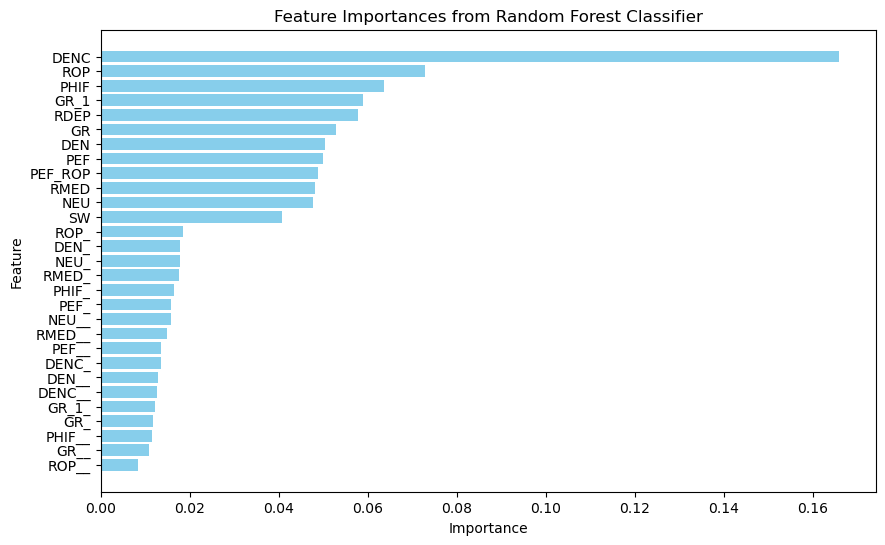

In [27]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_
features = train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()


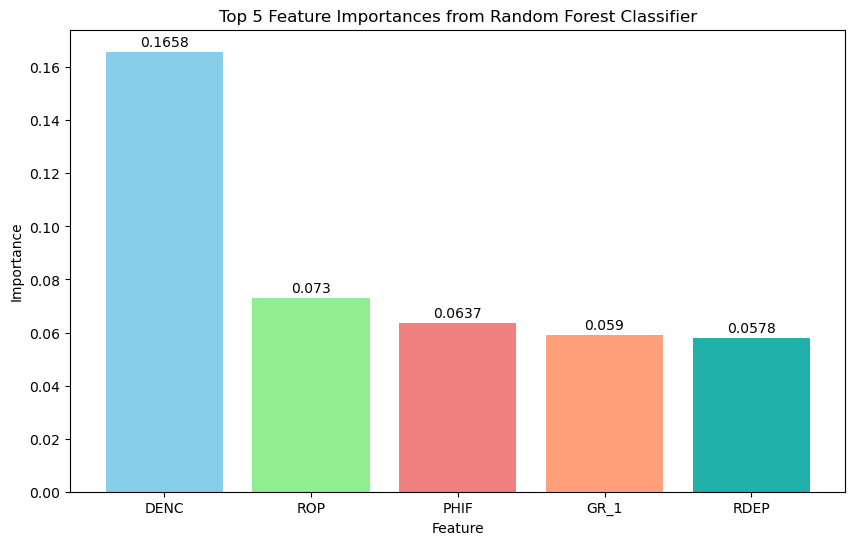

In [28]:
# Plot the top 5 feature importances as a histogram with different colors
top_5_features = importance_df.head(5)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_features['Feature'], top_5_features['Importance'], color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances from Random Forest Classifier')

# Adding the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.show()


In [29]:
# Load the CSV file
file_path = 'Borehole_Data.csv'
data = pd.read_csv(file_path)
# Filter out all the records where WELLNUM is 0
filtered_data = data[data['WELLNUM'] != 0]
filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']

g=[]
for i in filtered_data['Ra'].values:
   
   if np.abs(i) > 1.02 or np.abs(i)<0.98:
       g.append(0)
   else:
       g.append(1)    
gg = np.array(g)
filtered_data['Ra_C'] = gg


imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10), random_state=0, max_iter=20)
data = imputer.fit_transform(filtered_data)

# Convert X_imputed back to a DataFrame (if needed)
data = pd.DataFrame(data, columns=filtered_data.columns)

isolation_forest = IsolationForest(contamination=0.05, random_state=0)
outliers = isolation_forest.fit_predict(data)

# Filter out the outliers
data = data[outliers != -1]

test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
smote = SMOTE(random_state=42)
train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)
# # Linear Regression
rf=RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state=42)
###rf=RandomForestClassifier(n_estimators=100, max_features=0.5, min_samples_leaf=1, random_state=42)
rf.fit(train,train_labels)
predictions= rf.predict(test)


conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])



recall = recall_score(test_labels, predictions) 
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions)  # For binary classification
print(f"Precision: {precision}")

f1 = f1_score(predictions,test_labels)
print(f"F1 Score: {f1}")
conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_3788\3430415413.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_3788\3430415413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_3788\3430415413.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Recall: 0.8915375446960667
Precision: 0.7890295358649789
F1 Score: 0.8371572467823166


,Predicted Negative,Predicted Positive
Actual Negative,349,200
Actual Positive,91,748


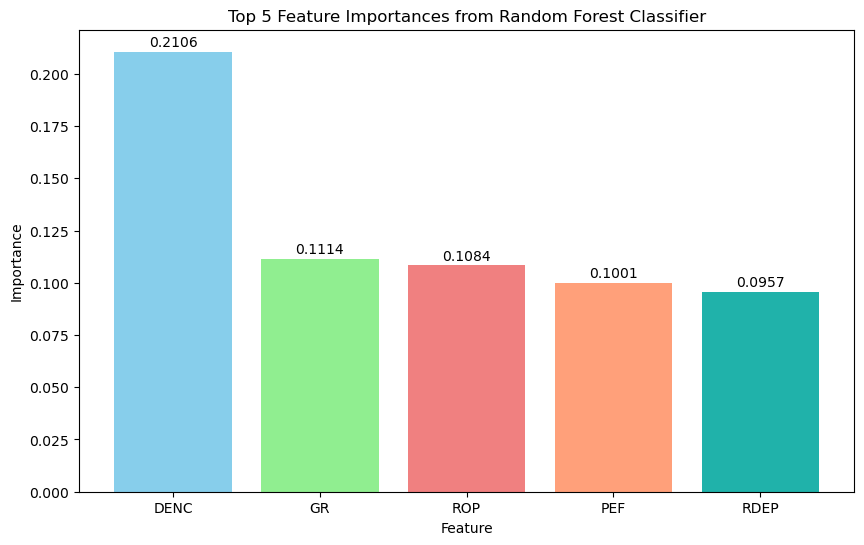

In [30]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_
features = train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plot the top 5 feature importances as a histogram with different colors
top_5_features = importance_df.head(5)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_features['Feature'], top_5_features['Importance'], color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances from Random Forest Classifier')

# Adding the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.show()

In [45]:
roc_auc_with

0.800730985582194

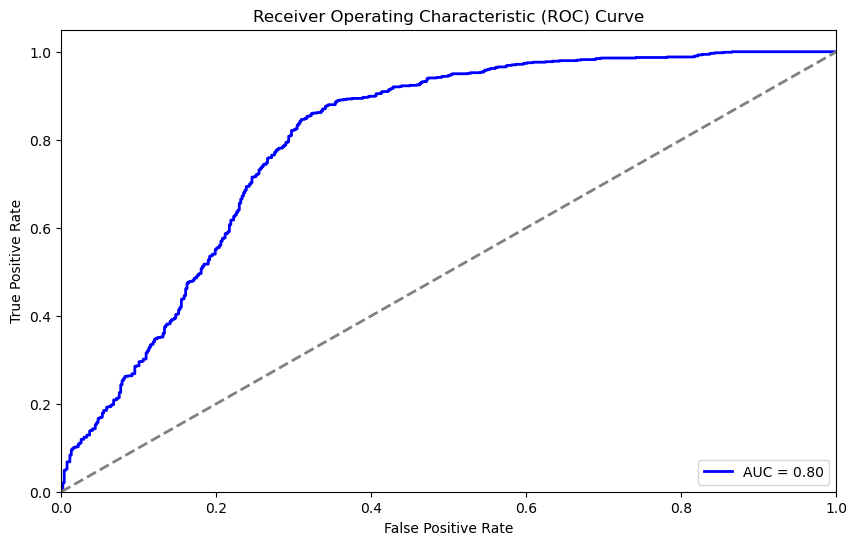

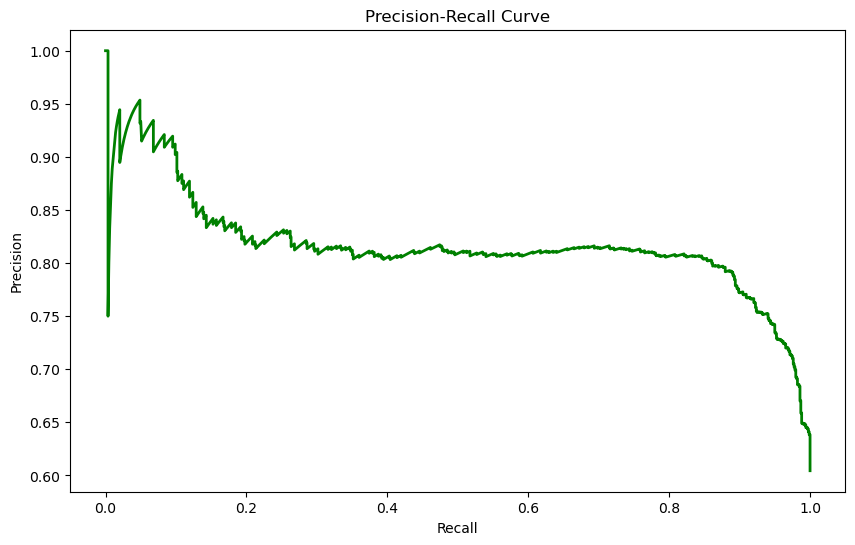

In [50]:

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, auc,precision_recall_curve
# Calculate ROC curve and AUC for the model with feature engineering
probs_with_engineering = rf.predict_proba(test)[:, 1]
fpr_with, tpr_with, _ = roc_curve(test_labels, probs_with_engineering)
roc_auc_with = auc(fpr_with, tpr_with)
precision_vals, recall_vals, _ = precision_recall_curve(test_labels, probs_with_engineering)

# Plot ROC curve for the model without feature engineering
plt.figure(figsize=(10, 6))
plt.plot(fpr_with, tpr_with, color='blue', lw=2, label='AUC = %.2f' % roc_auc_with)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.annotate(f"AUC = {roc_auc_with:.2f}", xy=(0.6, 0.2), fontsize=12, color='blue')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



In [25]:
# Load the CSV file
file_path = 'Borehole_Data.csv'
data = pd.read_csv(file_path)
# Filter out all the records where WELLNUM is 0
filtered_data = data[data['WELLNUM'] != 0]
filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']

g=[]
for i in filtered_data['Ra'].values:
   
   if np.abs(i) > 1.02 or np.abs(i)<0.98:
       g.append(0)
   else:
       g.append(1)    
gg = np.array(g)
filtered_data['Ra_C'] = gg


imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10), random_state=0, max_iter=20)
data = imputer.fit_transform(filtered_data)

# Convert X_imputed back to a DataFrame (if needed)
data = pd.DataFrame(data, columns=filtered_data.columns)

isolation_forest = IsolationForest(contamination=0.05, random_state=0)
outliers = isolation_forest.fit_predict(data)

# Filter out the outliers
data = data[outliers != -1]
data['DEN_'] = data['DEN'].diff().fillna(0)
data['DENC_'] = data['DENC'].diff().fillna(0)
data['GR_'] = data['GR'].diff().fillna(0)
data['NEU_'] = data['NEU'].diff().fillna(0)
data['PEF_'] = data['PEF'].diff().fillna(0)
#data['RDEP_'] = data['RDEP'].diff().fillna(0)
data['RMED_'] = data['RMED'].diff().fillna(0)
data['ROP_'] = data['ROP'].diff().fillna(0)
data['PHIF_'] = data['PHIF'].diff().fillna(0)
#data['SW_'] = data['SW'].diff().fillna(0)
data['PEF_ROP'] = 1/data['PEF']
data['GR_1'] = 1/data['GR']


data['DEN__'] = data['DEN_'].diff().fillna(0)
data['DENC__'] = data['DENC_'].diff().fillna(0)
data['GR__'] = data['GR_'].diff().fillna(0)
data['NEU__'] = data['NEU_'].diff().fillna(0)
data['PEF__'] = data['PEF_'].diff().fillna(0)
#data['RDEP__'] = data['RDEP_'].diff().fillna(0)
data['RMED__'] = data['RMED_'].diff().fillna(0)
data['ROP__'] = data['ROP_'].diff().fillna(0)
data['PHIF__'] = data['PHIF_'].diff().fillna(0)
#data['SW__'] = data['SW_'].diff().fillna(0)
data['GR_1_'] = data['GR_1'].diff().fillna(0)


test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
smote = SMOTE(random_state=42)
train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)


xgb = XGBClassifier(n_estimators=150, max_depth=30, learning_rate=0.03, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(train, train_labels)
predictions = xgb.predict(test)


conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])



recall = recall_score(test_labels, predictions) 
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions)  # For binary classification
print(f"Precision: {precision}")

f1 = f1_score(predictions,test_labels)
print(f"F1 Score: {f1}")
conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_3788\2710568168.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_3788\2710568168.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_3788\2710568168.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Recall: 0.8963051251489869
Precision: 0.7949260042283298
F1 Score: 0.8425770308123249


,Predicted Negative,Predicted Positive
Actual Negative,355,194
Actual Positive,87,752


In [7]:
train.columns

Index(['DEN', 'DENC', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP', 'PHIF', 'SW',
       'DEN_', 'DENC_', 'GR_', 'NEU_', 'PEF_', 'RMED_', 'ROP_', 'PHIF_',
       'PEF_ROP', 'GR_1', 'DEN__', 'DENC__', 'GR__', 'NEU__', 'PEF__',
       'RMED__', 'ROP__', 'PHIF__', 'GR_1_'],
      dtype='object')

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import IsolationForest

# Load the data
data_path = 'Borehole_Data.csv'
borehole_data = pd.read_csv(data_path)

# Filter the data for WELLNUM = 5
filtered_data = borehole_data[borehole_data['WELLNUM'] == 5]

# Select relevant columns
features_columns = ['WELLNUM', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'PHIF']
relevant_data = filtered_data[features_columns].dropna()

# Split data into features and target
X = relevant_data[['WELLNUM', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP']]
y = relevant_data['PHIF']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Initial Model MSE:", mse)
print("Initial Model R2:", r2)



# Applying Isolation Forest for various contamination levels
contamination_levels = [0.1, 0.15, 0.2, 0.25]
evaluation_results = {}

for contamination in contamination_levels:
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outliers = iso_forest.fit_predict(X)

    inlier_mask = outliers > 0
    X_filtered = X[inlier_mask]
    y_filtered = y[inlier_mask]

    X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
    model_f = LinearRegression()
    model_f.fit(X_train_f, y_train_f)
    y_pred_f = model_f.predict(X_test_f)

    mse_f = mean_squared_error(y_test_f, y_pred_f)
    mae_f = mean_absolute_error(y_test_f, y_pred_f)
    r2_f = r2_score(y_test_f, y_pred_f)
    rmse_f = np.sqrt(mse_f)

    evaluation_results[contamination] = {'MSE': mse_f, 'MAE': mae_f, 'RMSE': rmse_f, 'R2': r2_f, 'Inliers': len(X_filtered)}
print('-----Isolation Forest Applied Here-----')
# Output the evaluation results
for contamination, results in evaluation_results.items():
    print(f"Contamination: {contamination}")
    print("MSE:", results['MSE'])
    print("RMSE:", results['RMSE'])
    print("MAE:", results['MAE'])
    print("R2:", results['R2'])
    print("Inliers:", results['Inliers'])

Initial Model MSE: 0.00012020227301758781
Initial Model R2: 0.9719984597853866


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


-----Isolation Forest Applied Here-----
Contamination: 0.1
MSE: 8.441741648153619e-05
RMSE: 0.009187895106145705
MAE: 0.006915983755882299
R2: 0.9801411423983063
Inliers: 1265
Contamination: 0.15
MSE: 9.142193565922655e-05
RMSE: 0.009561481875694089
MAE: 0.007167690809841423
R2: 0.9733162805785002
Inliers: 1195
Contamination: 0.2
MSE: 8.340067119452007e-05
RMSE: 0.009132396793532357
MAE: 0.0068907630766791616
R2: 0.977998613624979
Inliers: 1125
Contamination: 0.25
MSE: 7.827165211606019e-05
RMSE: 0.00884712677178643
MAE: 0.006772997679342326
R2: 0.9781877878964786
Inliers: 1054


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [61]:
predictions

array([0., 1.])

In [63]:
test__= test.copy()

In [68]:
test__.drop(['DEN_','DENC_','GR_','NEU_','PEF_','RMED_','ROP_','PHIF_','PEF_ROP','GR_1','DEN__','DENC__','GR__','NEU__','PEF__','RMED__','ROP__','PHIF__','GR_1_'], axis=1, inplace=True)



In [69]:
test__.head()

,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW
36879,2.5143,0.0699,90.8153,0.2540,6.8099,1.7734,1.9145,19.9486,0.088,1.0
36880,2.5105,0.0670,90.6820,0.2526,6.8252,1.6996,1.7746,19.8968,0.090,1.0
36881,2.5070,0.0625,92.6109,0.2483,6.8410,1.6541,1.7661,19.8450,0.092,1.0
36882,2.5066,0.0587,94.9269,0.2434,6.8573,1.6404,1.7498,19.7932,0.092,1.0
36883,2.5102,0.0574,93.9358,0.2398,6.8730,1.6381,1.7455,19.8462,0.090,1.0


In [70]:
test__['Outlier'] = predictions

In [71]:
test__.head()

,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,Outlier
36879,2.5143,0.0699,90.8153,0.2540,6.8099,1.7734,1.9145,19.9486,0.088,1.0,0.0
36880,2.5105,0.0670,90.6820,0.2526,6.8252,1.6996,1.7746,19.8968,0.090,1.0,0.0
36881,2.5070,0.0625,92.6109,0.2483,6.8410,1.6541,1.7661,19.8450,0.092,1.0,0.0
36882,2.5066,0.0587,94.9269,0.2434,6.8573,1.6404,1.7498,19.7932,0.092,1.0,0.0
36883,2.5102,0.0574,93.9358,0.2398,6.8730,1.6381,1.7455,19.8462,0.090,1.0,0.0


In [73]:
test__= test__[test__['Outlier']==1]

In [77]:
test__['WELLNUM']= 5
test__.head()

C:\Users\desti\AppData\Local\Temp\ipykernel_456\1871297313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test__['WELLNUM']= 5


,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,Outlier,WELLNUM
36888,2.5159,0.0496,92.8342,0.2370,6.8988,1.5832,1.6156,19.9539,0.087,1.0,1.0,5
36897,2.5173,0.0603,104.1940,0.2691,6.8740,1.5717,1.5814,19.9593,0.086,1.0,1.0,5
36898,2.5166,0.0604,104.5330,0.2686,6.8760,1.5727,1.5956,19.9599,0.086,1.0,1.0,5
36899,2.5145,0.0615,102.5480,0.2646,6.8761,1.5541,1.5680,19.9605,0.088,1.0,1.0,5
36932,2.5416,0.0599,99.6043,0.2470,6.9642,1.3976,1.3301,19.7946,0.071,1.0,1.0,5


In [80]:

# Select relevant columns
features_columns = ['WELLNUM', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'PHIF']
relevant_data = test__[features_columns].dropna()

# Split data into features and target
X = relevant_data[['WELLNUM', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP']]
y = relevant_data['PHIF']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Initial Model MSE:", mse)
print("Initial Model R2:", r2)


# Applying Isolation Forest for various contamination levels
contamination_levels = [0.1, 0.15, 0.2, 0.25]
evaluation_results = {}

for contamination in contamination_levels:
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outliers = iso_forest.fit_predict(X)

    inlier_mask = outliers > 0
    X_filtered = X[inlier_mask]
    y_filtered = y[inlier_mask]

    X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
    model_f = LinearRegression()
    model_f.fit(X_train_f, y_train_f)
    y_pred_f = model_f.predict(X_test_f)

    mse_f = mean_squared_error(y_test_f, y_pred_f)
    mae_f = mean_absolute_error(y_test_f, y_pred_f)
    r2_f = r2_score(y_test_f, y_pred_f)
    rmse_f = np.sqrt(mse_f)

    evaluation_results[contamination] = {'MSE': mse_f, 'MAE': mae_f, 'RMSE': rmse_f, 'R2': r2_f, 'Inliers': len(X_filtered)}
print('-----Isolation Forest Applied Here-----')
# Output the evaluation results
for contamination, results in evaluation_results.items():
    print(f"Contamination: {contamination}")
    print("MSE:", results['MSE'])
    print("RMSE:", results['RMSE'])
    print("MAE:", results['MAE'])
    print("R2:", results['R2'])
    print("Inliers:", results['Inliers'])



Initial Model MSE: 6.2958433233205e-05
Initial Model R2: 0.9667741069282729


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


-----Isolation Forest Applied Here-----
Contamination: 0.1
MSE: 4.476174901671607e-05
RMSE: 0.006690422185237346
MAE: 0.00257829534200673
R2: 0.9745082934043416
Inliers: 855
Contamination: 0.15
MSE: 2.9713636656771056e-05
RMSE: 0.00545102161587817
MAE: 0.0024322329646551356
R2: 0.9812971152131729
Inliers: 807
Contamination: 0.2
MSE: 3.0424015917147133e-05
RMSE: 0.005515796943066988
MAE: 0.00190820012813652
R2: 0.9757101172594436
Inliers: 760
Contamination: 0.25
MSE: 2.672816511321859e-05
RMSE: 0.0051699289272889035
MAE: 0.0014257484048143057
R2: 0.9715419755513539
Inliers: 712


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
